# Assignment 89 - Implementation of ANN in Keras : Kundan Kumar¶

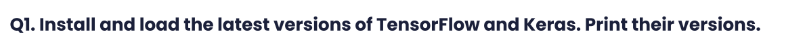

In [6]:
!pip install tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 72.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 27.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.6 MB/s et

In [11]:
import tensorflow as tf 
import keras
print("Tensorflow Version :" ,tf.__version__)
print("Keras Version :", keras.__version__)

Tensorflow Version : 2.15.0
Keras Version : 2.15.0


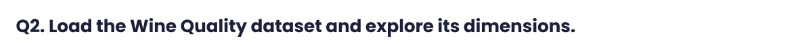

Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Wine Quality dataset 
df = pd.read_csv('wine.csv')
df.head()

#Explore the dimensions of the dataset
print("Dataset Dimension :", data.shape)


Dataset Dimension : (1599, 12)


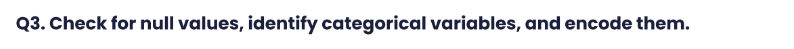

In [43]:
# Check for null values
data.isnull().sum()

# Identify categorical variables
df.info()
df.quality.unique() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


array(['bad', 'good'], dtype=object)

In [45]:
#(Quality is categorical , encoding the 'quality' labels to numerical values)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])
df.quality.unique()  

array([0, 1])

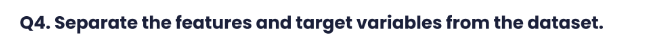

In [51]:
features= df.columns[0:-1]
target = df.columns[-1]
print("features :",features)
print("target: ",target)


features : Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
target:  quality


In [52]:
X = df[features]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [53]:
y = df[target]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

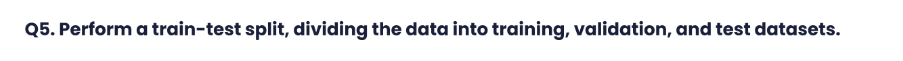

In [54]:
from sklearn.model_selection import train_test_split


X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and temporary data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Split the temporary data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=1)

# Print the shapes of the datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (959, 11) (959,)
Validation data shape: (320, 11) (320,)
Test data shape: (320, 11) (320,)


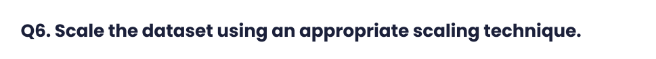

In [55]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

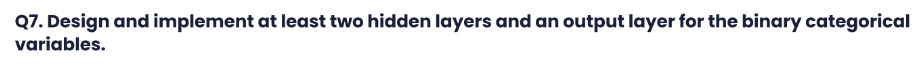

In [56]:
LAYERS = [tf.keras.layers.Flatten(input_shape=(X_train.shape[1],), name="inputLayer"),
          tf.keras.layers.Dense(64, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(32, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")]


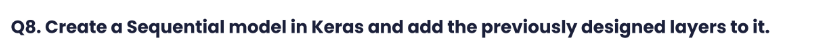

In [57]:
model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.layers

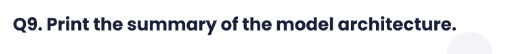

In [58]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 hiddenLayer2 (Dense)        (None, 32)                2080      
                                                                 
 outputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


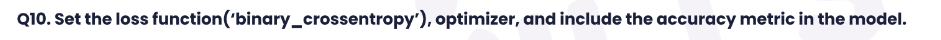

In [59]:
LOSS_FUNCTION = "binary_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


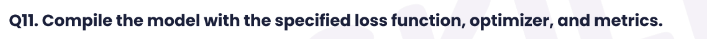

In [60]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

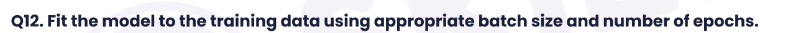

In [62]:
# training

EPOCHS = 30
VALIDATION_SET = (X_val_scaled, y_val)

history = model_clf.fit(X_train_scaled, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
30/30 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.7727 - val_loss: 0.5066 - val_accuracy: 0.7750
Epoch 2/30
30/30 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.7810 - val_loss: 0.5080 - val_accuracy: 0.7937
Epoch 3/30
30/30 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.7873 - val_loss: 0.5026 - val_accuracy: 0.7812
Epoch 4/30
30/30 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.7821 - val_loss: 0.5024 - val_accuracy: 0.7844
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.7862 - val_loss: 0.4990 - val_accuracy: 0.7969
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7883 - val_loss: 0.4995 - val_accuracy: 0.7875
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.7883 - val_loss: 0.4989 - val_accuracy: 0.7969
Epoch 8/30
30/30 [==

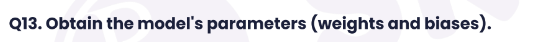

In [ ]:
# Get the model's parameters
model_params = model_clf.get_weights()
model_params

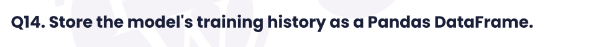

In [70]:
history_df = pd.DataFrame(history.history)
history_df.tail()


,loss,accuracy,val_loss,val_accuracy
25,0.376025,0.832117,0.492087,0.790625
26,0.374742,0.835245,0.494276,0.800000
27,0.371256,0.839416,0.500919,0.781250
28,0.370286,0.828989,0.489588,0.800000
29,0.367505,0.839416,0.497254,0.787500


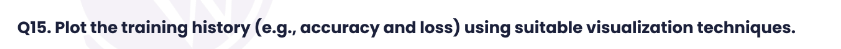

<AxesSubplot: >

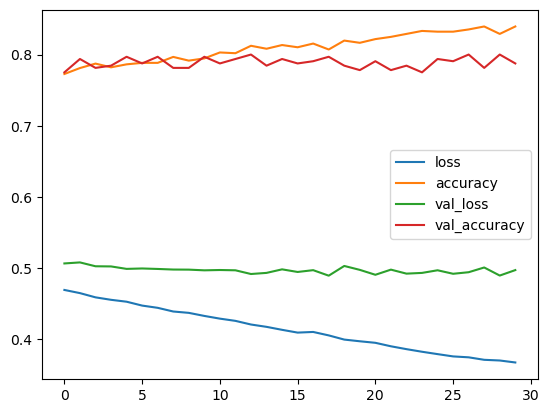

In [69]:
pd.DataFrame(history.history).plot()

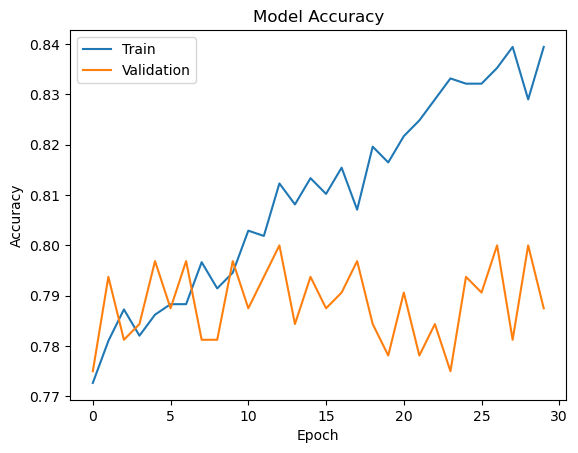

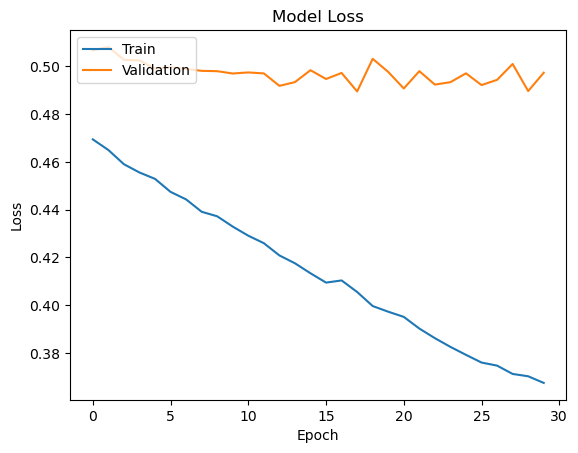

In [71]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

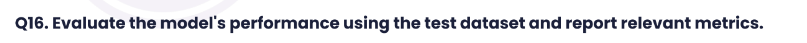

In [73]:
# Evaluate the model on the test set
loss, accuracy = model_clf.evaluate(X_test_scaled, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7500
Test Loss: 0.4685714840888977
Test Accuracy: 0.75
